Dataset: depedSS.csv

# Ensemble-Based Model

# FEATURE SELECTION

###Attributes (DepEd SS data)
  1. SchID: unique 6-digit code assigned to public school (numeric)
  2. SchName : name of school (object: text)
  3. DivName : division name (object: mixed characters)
  4. DivCode : division code (object: mixed characters)
  5. Clusters: NAT grouping by DepEd (categorical: "1", "2", "3", "4", "5", "6")
  6. Region: schools regional location (categorical: values 1 to 16)
  7. Filipno: school average filipino NAT score (categorical: "1", "2", "3", "4", "5", "6")
  8. AralinP: school average araling panlipunan NAT score (categorical: "1", "2", "3", "4", "5", "6")
  9. Mathematics: school average mathematics NAT score (categorical: "1", "2", "3", "4", "5", "6")
  10. Science: school average science NAT score (categorical: "1", "2", "3", "4", "5", "6")categorical: 1 means below 75; 2 means above 75)
  11. English: school average english NAT score (categorical: "1", "2", "3", "4", "5", "6")
  12. Overall: school average NAT score (categorical: "1", "2", "3", "4", "5", "6")
  13. Internet: does school have internet (binary: 0 means "no", 1 means "yes")
  14. Lat: latitude coordinate location of school (numeric: -90 to 90)
  15. Long: longitude coordinate location of school (numeric: -180 to 180)
  16. Enrolled: number of students (numeric)
  17. Teacher: number of teacher items (numeric)
  18. Ratio: teacher to student ratio(numeric between 0 to 1)
  19. Energized : does school have electricity (binary: 0 means "no", 1 means "yes")
  20. SchType: type of school (categorical: "School with no annexes","mother school", "Annex or extension")

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier, plot_importance

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Upload data set, drop unnecessary columns, identify target/independent columns

In [3]:
data = pd.read_csv("DepEd_SS.CSV")

In [4]:
data.head()

,SchID,SchName,DivisionName,DivisionCode,Province,MunicipalityORCity,Clusters,Region,Filipino,AralinP,...,Enrolled,Teachers,Ratio,Energized,SchoolType,PBOR,PovertyCluster,PovertyIncidence,LowerLimit,UpperLimit
0,317312,La-Union Integrated HS,Cabadbaran City,R10,AGUSAN DEL NORTE,CITY OF CABADBARAN,4,CARAGA,58.8889,43.2184,...,266,10,27.000000,1,Annex or Extension school(s),12911,2,28,20,72
1,304690,Lingayao NHS,Agusan Del Norte,R01,AGUSAN DEL NORTE,LAS NIEVES,5,CARAGA,80.2000,71.3667,...,273,11,24.818182,1,School with no Annexes,12911,2,28,20,72
2,304689,Las Nieves NHS,Agusan Del Norte,R01,AGUSAN DEL NORTE,LAS NIEVES,3,CARAGA,71.1937,66.0586,...,748,42,17.809524,1,School with no Annexes,12911,2,28,20,72
3,317310,E. G. Montilla NHS (Mat-I NHS Annex),Agusan Del Norte,R01,AGUSAN DEL NORTE,LAS NIEVES,5,CARAGA,68.6054,64.0136,...,511,27,19.000000,1,Annex or Extension school(s),12911,2,28,20,72
4,317311,Balangbalang NHS (Agay NHS Annex),Agusan Del Norte,R01,AGUSAN DEL NORTE,REMEDIOS T. ROMUALDEZ,4,CARAGA,72.9398,69.4213,...,511,27,19.000000,1,Annex or Extension school(s),12911,2,28,20,72


In [5]:
data.columns

Index([u'SchID', u'SchName', u'DivisionName', u'DivisionCode', u'Province',
       u'MunicipalityORCity', u'Clusters', u'Region', u'Filipino', u'AralinP',
       u'Mathematics', u'Science', u'English', u'CriticalThinking', u'Overall',
       u'Internet', u'Lat', u'Long', u'Enrolled', u'Teachers', u'Ratio',
       u'Energized', u'SchoolType', u'PBOR', u'PovertyCluster',
       u'PovertyIncidence', u'LowerLimit', u'UpperLimit'],
      dtype='object')

In [6]:
data.describe(include='all')

,SchID,SchName,DivisionName,DivisionCode,Province,MunicipalityORCity,Clusters,Region,Filipino,AralinP,...,Enrolled,Teachers,Ratio,Energized,SchoolType,PBOR,PovertyCluster,PovertyIncidence,LowerLimit,UpperLimit
count,736.000000,736,736,736,736,736,736.000000,736,736.000000,736.000000,...,736.000000,736.000000,736.000000,736.000000,736,736.000000,736.000000,736.000000,736.000000,736.000000
unique,NaN,715,164,165,82,526,NaN,17,NaN,NaN,...,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,Libertad NHS,Cebu,G02,CEBU,CEBU CITY (Capital),NaN,VII,NaN,NaN,...,NaN,NaN,NaN,NaN,School with no Annexes,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,27,27,50,6,NaN,85,NaN,NaN,...,NaN,NaN,NaN,NaN,515,NaN,NaN,NaN,NaN,NaN
mean,304827.574728,NaN,NaN,NaN,NaN,NaN,3.517663,NaN,60.037934,50.047568,...,895.637228,31.554348,36.274719,0.966033,NaN,11705.804348,3.024457,21.790761,15.869565,27.425272
std,13912.412857,NaN,NaN,NaN,NaN,NaN,1.296657,NaN,8.271743,9.314163,...,1134.643652,40.678093,70.782824,0.181268,NaN,2789.108511,1.261443,13.480537,11.235723,16.372363
min,100189.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,29.878600,27.741900,...,60.000000,1.000000,5.836364,0.000000,NaN,672.000000,1.000000,0.000000,0.000000,0.000000
25%,301973.750000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,54.971550,43.422225,...,290.000000,10.000000,24.425595,1.000000,NaN,10751.000000,2.000000,12.000000,9.000000,16.000000
50%,303663.500000,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,59.420050,49.070250,...,508.000000,18.000000,27.094697,1.000000,NaN,11751.000000,3.000000,19.000000,14.000000,24.000000
75%,306035.750000,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,65.438650,55.445475,...,973.250000,34.000000,31.000000,1.000000,NaN,12911.000000,4.000000,30.000000,21.000000,40.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 28 columns):
SchID                 736 non-null int64
SchName               736 non-null object
DivisionName          736 non-null object
DivisionCode          736 non-null object
Province              736 non-null object
MunicipalityORCity    736 non-null object
Clusters              736 non-null int64
Region                736 non-null object
Filipino              736 non-null float64
AralinP               736 non-null float64
Mathematics           736 non-null float64
Science               736 non-null float64
English               736 non-null float64
CriticalThinking      736 non-null float64
Overall               736 non-null float64
Internet              736 non-null int64
Lat                   736 non-null float64
Long                  736 non-null float64
Enrolled              736 non-null int64
Teachers              736 non-null int64
Ratio                 736 non-null float64
Energize

In [8]:
data['Reg'] = data['Region'].astype('category')

In [9]:
data['SType'] = data['SchoolType'].astype('category')

In [10]:
bins = [0, 65, 100]
data['Average'] = np.searchsorted(bins, data['Overall'].values)

In [11]:
data.Region = pd.Categorical(data.Region)
data['Reg'] = data.Region.cat.codes

In [12]:
data.SchoolType = pd.Categorical(data.SchoolType)
data['SType'] = data.SchoolType.cat.codes

In [14]:
data.DivisionName = pd.Categorical(data.DivisionName)
data['Div'] = data.DivisionName.cat.codes

In [18]:
df = data.drop(['Province', 'MunicipalityORCity', 'PovertyCluster', 'LowerLimit', 'UpperLimit', 'Div', 'Mathematics', 'Filipino', 'CriticalThinking', 'AralinP', 'Science', 'English', 'Overall', 'DivisionName', 'Region', 'SchoolType', 'SchID', 'SchName', 'Clusters', 'DivisionCode','Lat', 'Long', 'Enrolled', 'Teachers'], axis=1)

In [19]:
df.head()

,Internet,Ratio,Energized,PBOR,PovertyIncidence,Reg,SType,Average
0,0,27.000000,1,12911,28,2,0,1
1,0,24.818182,1,12911,28,2,2,2
2,1,17.809524,1,12911,28,2,2,2
3,1,19.000000,1,12911,28,2,0,1
4,0,19.000000,1,12911,28,2,0,2


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 8 columns):
Internet            736 non-null int64
Ratio               736 non-null float64
Energized           736 non-null int64
PBOR                736 non-null int64
PovertyIncidence    736 non-null int64
Reg                 736 non-null int8
SType               736 non-null int8
Average             736 non-null int64
dtypes: float64(1), int64(5), int8(2)
memory usage: 36.0 KB


In [21]:
df.describe()

,Internet,Ratio,Energized,PBOR,PovertyIncidence,Reg,SType,Average
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,0.730978,36.274719,0.966033,11705.804348,21.790761,8.457880,1.551630,1.119565
std,0.443753,70.782824,0.181268,2789.108511,13.480537,4.572425,0.737746,0.324673
min,0.000000,5.836364,0.000000,672.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,24.425595,1.000000,10751.000000,12.000000,5.000000,1.000000,1.000000
50%,1.000000,27.094697,1.000000,11751.000000,19.000000,9.000000,2.000000,1.000000
75%,1.000000,31.000000,1.000000,12911.000000,30.000000,12.000000,2.000000,1.000000
max,1.000000,1736.000000,1.000000,17864.000000,66.000000,16.000000,2.000000,2.000000


In [22]:
X = df.drop('Average', axis=1) #independent columns
y = df['Average']              #target column i.e price range   

In [23]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(5,'Score'))  #print 10 best features

              Specs        Score
3              PBOR  2838.614416
4  PovertyIncidence   198.849396
1             Ratio     6.123397
2         Energized     0.119376
6             SType     0.104446


## Feature Importance

/Users/EsaNavarro/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.02669925 0.56530644 0.00475908 0.07624362 0.21015447 0.07258485
 0.04425229]


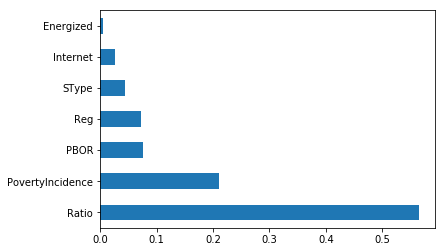

In [24]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Correlation Map

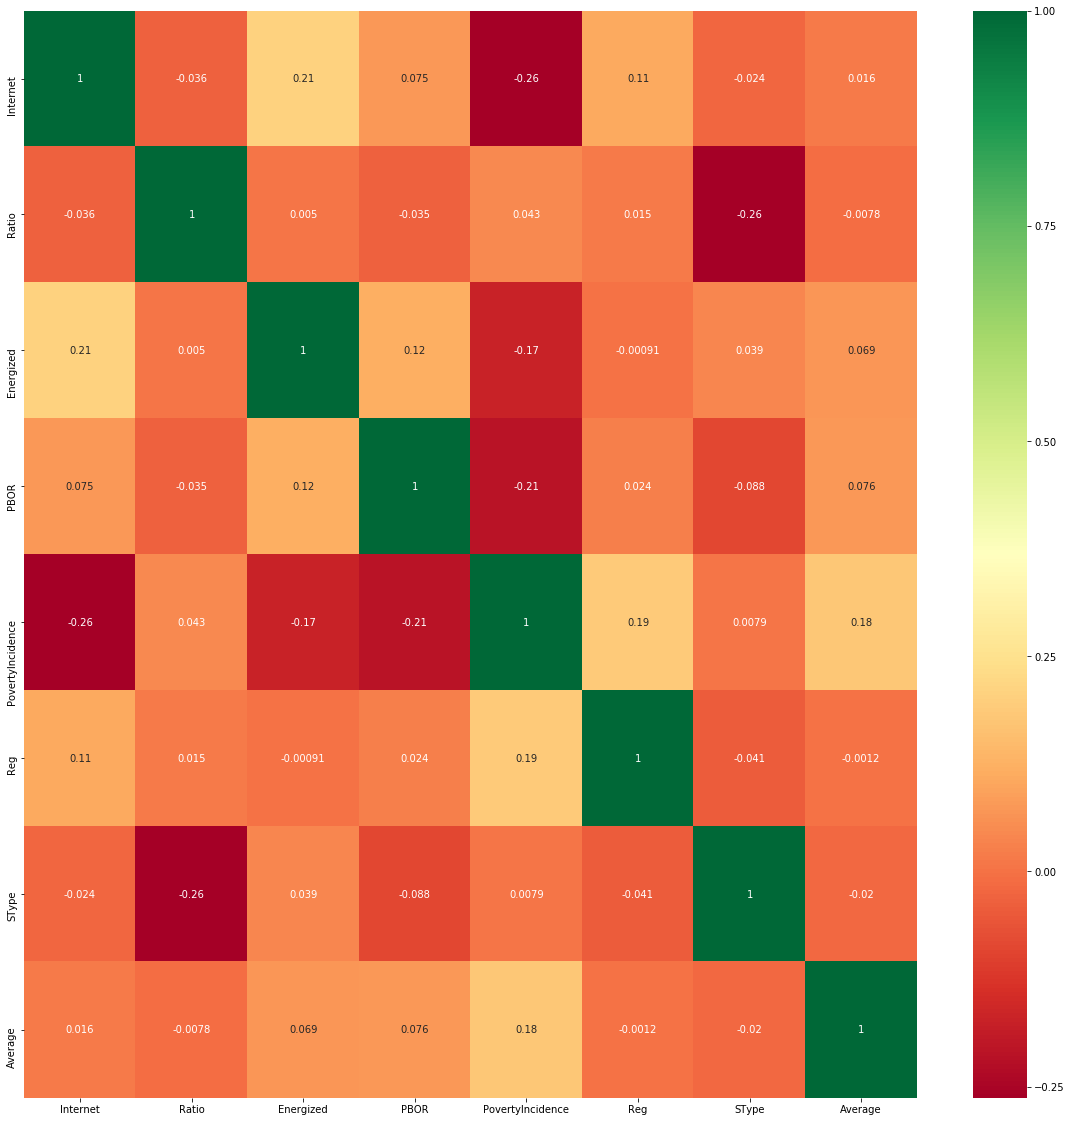

In [25]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [26]:
corrmat

,Internet,Ratio,Energized,PBOR,PovertyIncidence,Reg,SType,Average
Internet,1.000000,-0.035976,0.207612,0.075057,-0.263017,0.111752,-0.024009,0.015807
Ratio,-0.035976,1.000000,0.004975,-0.035358,0.043172,0.015091,-0.261580,-0.007767
Energized,0.207612,0.004975,1.000000,0.119285,-0.171060,-0.000908,0.038566,0.069102
PBOR,0.075057,-0.035358,0.119285,1.000000,-0.210073,0.023838,-0.087955,0.076233
PovertyIncidence,-0.263017,0.043172,-0.171060,-0.210073,1.000000,0.187542,0.007928,0.180114
Reg,0.111752,0.015091,-0.000908,0.023838,0.187542,1.000000,-0.041099,-0.001185
SType,-0.024009,-0.261580,0.038566,-0.087955,0.007928,-0.041099,1.000000,-0.020127
Average,0.015807,-0.007767,0.069102,0.076233,0.180114,-0.001185,-0.020127,1.000000


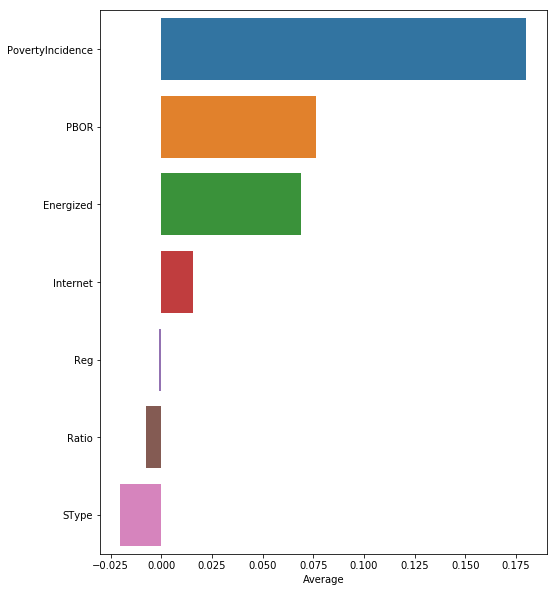

In [27]:
# Feature sorted by correlation to Overall, from positive to negative
corr = corrmat.sort_values('Average', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( corr.Average[1:], corr.index[1:], orient='h')
plt.show()

Correlation is not used in the prediction process, but provides information regarding the direction and strength of the relation between chosen predictors, such as electricity, provincial or regional location, and average class size to educational constructs with academic achievement. In spite of being useful, correlation is not an accurate technique to report if one variable is a good or a bad predictor of another variable. If two variables present a small or non-statistically significant correlation coefficient, it does not necessarily means that one can’t be used to predict the other.

# Ensemble Model

Now we get to the machine learning section. We will start by encoding our categorical variables and splitting the data into a train and test set.

In [28]:
# Encoding our categorical columns in X
labelEncoder = LabelEncoder()
cat_columns = X.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_columns:
    X[col] = labelEncoder.fit_transform(X[col])

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [29]:
# Logistic Regression as baseline, then exploring tree-based methods

keys = []
scores = []
models = {'Logistic Regression': LogisticRegression(), 'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(n_estimators=100, random_state=100)}

for k,v in models.items():
    mod = v
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    print('Results for: ' + str(k) + '\n')
    print(confusion_matrix(y_test, pred))
    print(classification_report(y_test, pred))
    acc = accuracy_score(y_test, pred)
    print("accuracy is "+ str(acc)) 
    print('\n' + '\n')
    keys.append(k)
    scores.append(acc)
    table = pd.DataFrame({'model':keys, 'accuracy score':scores})

print(table)

Results for: Random Forest

[[158   7]
 [ 17   2]]
              precision    recall  f1-score   support

           1       0.90      0.96      0.93       165
           2       0.22      0.11      0.14        19

   micro avg       0.87      0.87      0.87       184
   macro avg       0.56      0.53      0.54       184
weighted avg       0.83      0.87      0.85       184

accuracy is 0.8695652173913043



Results for: Logistic Regression

[[159   6]
 [ 19   0]]
              precision    recall  f1-score   support

           1       0.89      0.96      0.93       165
           2       0.00      0.00      0.00        19

   micro avg       0.86      0.86      0.86       184
   macro avg       0.45      0.48      0.46       184
weighted avg       0.80      0.86      0.83       184

accuracy is 0.8641304347826086



Results for: Decision Tree

[[144  21]
 [ 14   5]]
              precision    recall  f1-score   support

           1       0.91      0.87      0.89       165
          

/Users/EsaNavarro/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The Random Forest and Logistic Regression Classifier performed best. Let's explore the number of estimators in the forest further. A general rule is that the RFC performs better when the amount of estimators increases.

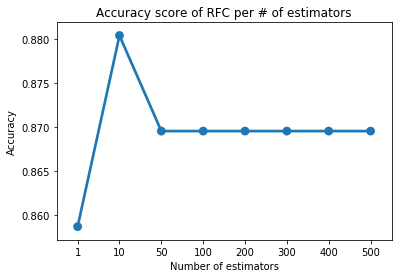

In [30]:
# Exploring the number of estimators in the random forest
score = []
est = []
estimators = [1, 10, 50, 100, 200, 300, 400, 500]
for e in estimators:
    rfc1 = RandomForestClassifier(n_estimators=e, random_state=100)
    pred1 = rfc1.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred1)
    score.append(accuracy)
    est.append(e)
plot = sns.pointplot(x=est, y=score)
plot.set(xlabel='Number of estimators', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of estimators')
plt.show()

And indeed, the RFC performs better when the number of estimators increases. However, it plateaus at 100 estimators. In the for loop before I used 300 estimators which is a general number I like to start trying it out with. Apparently 100 estimators is enough for this dataset. If you start experimenting on a very large dataset, having less estimators will save you a lot of running time.

We can also explore another variable like the minimum number of samples required to be at a leaf node.

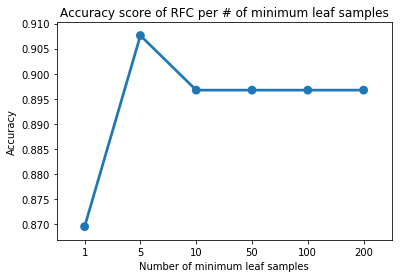

In [31]:
# Exploring minimum leaf samples
score = []
leaf = []
leaf_options = [1, 5, 10, 50, 100, 200]
for l in leaf_options:
    rfc2 = RandomForestClassifier(n_estimators=200, random_state=100, min_samples_leaf=l)
    pred2 = rfc2.fit(X_train, y_train).predict(X_test)
    accuracy = accuracy_score(y_test, pred2)
    score.append(accuracy)
    leaf.append(l)
plot = sns.pointplot(x=leaf, y=score)
plot.set(xlabel='Number of minimum leaf samples', ylabel='Accuracy', 
         title='Accuracy score of RFC per # of minimum leaf samples')
plt.show()

Extreme Gradient Boosting Many Kaggle competitions have been won by using Extreme Gradient Boosting. I have never used it so let's give it a try. 

In [32]:
xgb = XGBClassifier(seed=52)
pred = xgb.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("accuracy is "+ str(accuracy_score(y_test, pred)))

[[164   1]
 [ 17   2]]
              precision    recall  f1-score   support

           1       0.91      0.99      0.95       165
           2       0.67      0.11      0.18        19

   micro avg       0.90      0.90      0.90       184
   macro avg       0.79      0.55      0.56       184
weighted avg       0.88      0.90      0.87       184

accuracy is 0.9021739130434783


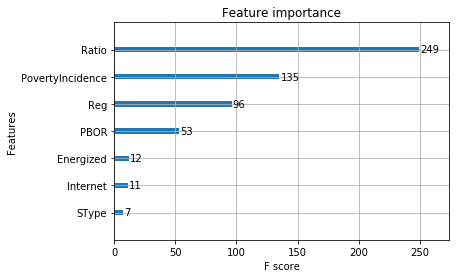

In [33]:
plot_importance(xgb)
plt.rcParams['figure.figsize']=(10,5)
plt.show()

Next step is to try and improve the performance of our XGB Classifier by trying some different parameters and using a grid search approach.

In [34]:
# Let's try to improve the accuracy of the XGClassifier with a grid search approach.

d_values = []
l_values = []
n_values = []
acc_values = []
depth = [2, 3, 4]
learning_Rate = [0.01, 0.1, 1]
n_estimators = [50, 100, 150, 200]
for d in depth:
    for l in learning_Rate:
        for n in n_estimators:
            xgb = XGBClassifier(max_depth=d, learning_rate=l, n_estimators=n, seed=52)
            pred = xgb.fit(X_train, y_train).predict(X_test)
            acc = accuracy_score(y_test, pred)
            d_values.append(d)
            l_values.append(l)
            n_values.append(n)
            acc_values.append(acc)
            
dict = {'max_depth':d_values, 'learning_rate':l_values, 'n_estimators':n_values,
       'accuracy':acc_values}

output = pd.DataFrame.from_dict(data=dict)
print(output.sort_values(by='accuracy', ascending=False))

    accuracy  learning_rate  max_depth  n_estimators
13  0.913043           0.01          3           100
18  0.907609           0.10          3           150
27  0.907609           0.01          4           200
16  0.907609           0.10          3            50
25  0.907609           0.01          4           100
26  0.907609           0.01          4           150
5   0.907609           0.10          2           100
4   0.907609           0.10          2            50
6   0.902174           0.10          2           150
7   0.902174           0.10          2           200
19  0.902174           0.10          3           200
24  0.902174           0.01          4            50
12  0.902174           0.01          3            50
28  0.902174           0.10          4            50
14  0.902174           0.01          3           150
15  0.902174           0.01          3           200
17  0.902174           0.10          3           100
31  0.896739           0.10          4        

Accuracy only improved slight.


The XGB model now also performs better than the random forest classifier which capped at 0.847826.

Let's explore the important features in this 'best' model.

[[160   5]
 [ 16   3]]
              precision    recall  f1-score   support

           1       0.91      0.97      0.94       165
           2       0.38      0.16      0.22        19

   micro avg       0.89      0.89      0.89       184
   macro avg       0.64      0.56      0.58       184
weighted avg       0.85      0.89      0.86       184

accuracy is 0.8858695652173914


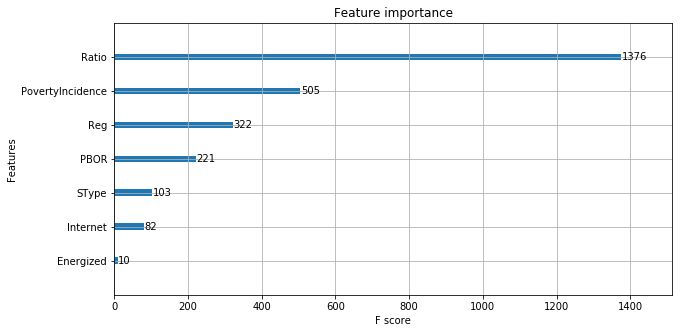

In [35]:
# Building the best XGB and looking at feature importances

xgb2 = XGBClassifier(max_depth=4, learning_rate=0.1, n_estimators=300, seed=52)
pred = xgb2.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print("accuracy is "+ str(accuracy_score(y_test, pred)))   

plot_importance(xgb2)
plt.rcParams['figure.figsize']=(10,5)
plt.show()

Let's explore the feature importances of our best Random Forest model as well.

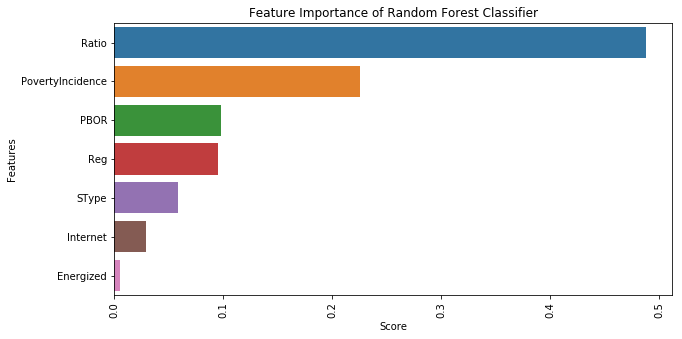

In [36]:
rfc = RandomForestClassifier(n_estimators=300, random_state=52)
pred = rfc.fit(X_train, y_train).predict(X_test)
dn = {'features':X.columns, 'score':rfc.feature_importances_}
df = pd.DataFrame.from_dict(data=dn).sort_values(by='score', ascending=False)
plot = sns.barplot(x='score', y='features', data=df, orient='h')
plot.set(xlabel='Score', ylabel='Features', 
         title='Feature Importance of Random Forest Classifier')
plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

Ratio (or average class size) and Div (or locatio) top both RFC and XGB. It was followed by Poverty Incidence, PBOR (budget per student), Region, and School Type. The school being in the city or not and having electricity and internet have the least feature importance.